In [1]:
import warnings

warnings.filterwarnings('ignore')

# Dataset and Knowledge settings

In [2]:
import pandas as pd

df = pd.read_csv('./resources/pima_diabetes/data.csv')
df['Insulin'] = df['Insulin'].astype(float)
df['SkinThickness'] = df['SkinThickness'].astype(float)
df['BloodPressure'] = df['BloodPressure'].astype(float)
df['Glucose'] = df['Glucose'].astype(float)
df['Pregnancies'] = df['Pregnancies'].astype(float)
df['Age'] = df['Age'].astype(float)
df['Outcome'] = df['Outcome'].astype(float)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [3]:
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
from causal_nest.knowledge import parse_knowledge_file

knowledge = parse_knowledge_file('./resources/pima_diabetes/knowledge.txt')
knowledge

Knowledge(required_edges=[], forbidden_edges=[('Glucose', 'DiabetesPedigreeFunction'), ('Outcome', 'BloodPressure'), ('Glucose', 'SkinThickness'), ('Glucose', 'Age'), ('Outcome', 'BMI'), ('Insulin', 'Pregnancies'), ('Outcome', 'Age'), ('Outcome', 'Glucose'), ('BMI', 'Pregnancies'), ('BloodPressure', 'Pregnancies'), ('Outcome', 'Pregnancies'), ('Insulin', 'DiabetesPedigreeFunction'), ('Insulin', 'SkinThickness'), ('Glucose', 'Pregnancies'), ('Insulin', 'Age'), ('BloodPressure', 'DiabetesPedigreeFunction'), ('BloodPressure', 'SkinThickness'), ('BMI', 'DiabetesPedigreeFunction'), ('BMI', 'SkinThickness'), ('Outcome', 'DiabetesPedigreeFunction'), ('Outcome', 'SkinThickness'), ('BMI', 'Age'), ('BloodPressure', 'Age'), ('Outcome', 'Insulin')])

In [5]:
from causal_nest.dataset import MissingDataHandlingMethod, Dataset, handle_missing_data, FeatureTypeMap, FeatureType, estimate_feature_importances

feature_mapping = [FeatureTypeMap(feature=c, type=FeatureType.CONTINUOUS) for c in df.drop('Outcome', axis=1).columns]

dataset = Dataset(data=df, target='Outcome', feature_mapping=feature_mapping)
dataset = handle_missing_data(dataset, MissingDataHandlingMethod.FORWARD_FILL)
dataset = estimate_feature_importances(dataset)
dataset

Dataset(data=     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1   

In [6]:
from causal_nest.problem import Problem

problem = Problem(dataset=dataset, description='PIMA Diabetes', knowledge=knowledge)
problem

Problem(dataset=Dataset(data=     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0

## Checking the Feature infered importance

In [7]:
problem.dataset.feature_mapping

[FeatureTypeMap(feature='Glucose', type=<FeatureType.CONTINUOUS: 3>, importance=0.32639065085895264),
 FeatureTypeMap(feature='BMI', type=<FeatureType.CONTINUOUS: 3>, importance=0.17099120043983312),
 FeatureTypeMap(feature='Age', type=<FeatureType.CONTINUOUS: 3>, importance=0.12882581544960459),
 FeatureTypeMap(feature='DiabetesPedigreeFunction', type=<FeatureType.CONTINUOUS: 3>, importance=0.12747916490001696),
 FeatureTypeMap(feature='BloodPressure', type=<FeatureType.CONTINUOUS: 3>, importance=0.08561319704044411),
 FeatureTypeMap(feature='Pregnancies', type=<FeatureType.CONTINUOUS: 3>, importance=0.06415612624027486),
 FeatureTypeMap(feature='Insulin', type=<FeatureType.CONTINUOUS: 3>, importance=0.05213208481443963),
 FeatureTypeMap(feature='SkinThickness', type=<FeatureType.CONTINUOUS: 3>, importance=0.044411760256434285)]

# Causal Discovery

In [8]:
from causal_nest.discovery import applyable_models

models = applyable_models(problem)
models

[causal_nest.discovery_models.pc.PC,
 causal_nest.discovery_models.gs.GS,
 causal_nest.discovery_models.ccdr.CCDR,
 causal_nest.discovery_models.iamb.IAMB,
 causal_nest.discovery_models.sam.SAM,
 causal_nest.discovery_models.bes.BES,
 causal_nest.discovery_models.grasp.GRASP,
 causal_nest.discovery_models.cgnn.CGNN]

  0%|          | 0/1000 [00:00<?, ?it/s]

GRaSP edge count: 15    
GRaSP completed in: 0.25s 


  0%|          | 1/1000 [00:00<10:32,  1.58it/s, disc=0.425, gen=-.0451, regul_loss=0.925, tot=-2.32]


~Stats for BES~

		Runtime: 1.236846 seconds
		AUC_PR: None

  0%|          | 2/1000 [00:01<09:36,  1.73it/s, disc=0.425, gen=-.0451, regul_loss=0.925, tot=-2.32]


		SHD: None
		SID: None
		Priority Score: 0.0
		Integrity Score: 0.45833333333333337
		Forbidden Edges Violation Rate: 0.5416666666666666
		Required Edges Compliance Rate: 1.0




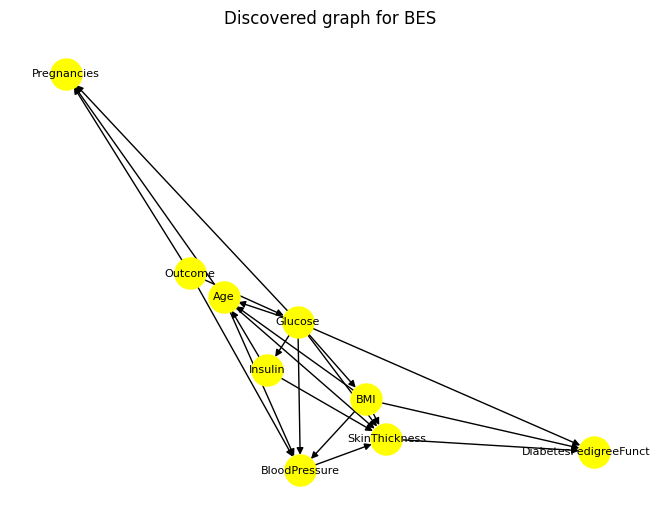

  1%|          | 6/1000 [00:02<07:07,  2.33it/s, disc=0.425, gen=-.0451, regul_loss=0.925, tot=-2.32]


~Stats for CCDR~

		Runtime: 3.029621 seconds
		AUC_PR: None
		SHD: None
		SID: None
		Priority Score: 0.9424603174603172
		Integrity Score: 0.75
		Forbidden Edges Violation Rate: 0.25
		Required Edges Compliance Rate: 1.0




  1%|          | 7/1000 [00:03<06:55,  2.39it/s, disc=0.425, gen=-.0451, regul_loss=0.925, tot=-2.32]

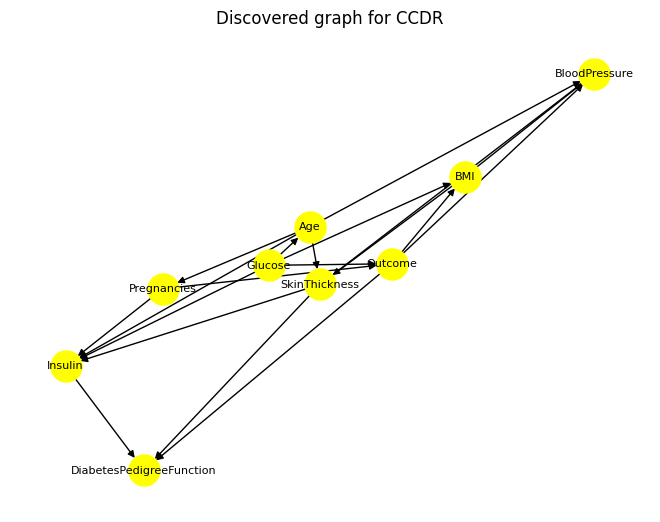

100%|██████████| 1000/1000 [13:31<00:00,  1.23it/s, disc=-1.02, gen=-.104, regul_loss=0.209, tot=-7.16]


{'PC': None,
 'GS': None,
 'CCDR': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada51a90>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=3.0296207450010115, priority_score=0.9424603174603172, knowledge_integrity_score=0.75, forbidden_edges_violation_rate=0.25, required_edges_compliance_rate=1.0),
 'IAMB': None,
 'SAM': None,
 'BES': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada517f0>, model='BES', auc_pr=None, shd=None, sid=None, runtime=1.2368457190023037, priority_score=0.0, knowledge_integrity_score=0.45833333333333337, forbidden_edges_violation_rate=0.5416666666666666, required_edges_compliance_rate=1.0),
 'GRASP': None,
 'CGNN': None}

In [9]:
from causal_nest.discovery import discover_with_all_models

problem = discover_with_all_models(problem, verbose=True, max_seconds_model=14400)
problem.discovery_results

In [10]:
list(sorted(filter(lambda x: x, problem.discovery_results.values()), key=lambda x: x.priority_score, reverse=True))

[DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada51a90>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=3.0296207450010115, priority_score=0.9424603174603172, knowledge_integrity_score=0.75, forbidden_edges_violation_rate=0.25, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada517f0>, model='BES', auc_pr=None, shd=None, sid=None, runtime=1.2368457190023037, priority_score=0.0, knowledge_integrity_score=0.45833333333333337, forbidden_edges_violation_rate=0.5416666666666666, required_edges_compliance_rate=1.0)]

# Causal Estimation

In [11]:
from causal_nest.estimation import estimate_all_effects

problem = estimate_all_effects(problem, verbose=True, max_seconds_model=14400)
problem.estimation_results

{'CCDR': [EstimationResult(model='CCDR', treatment='Glucose', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff137a6f70>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff137aa2e0>, control_value=0, treatment_value=1, p_value=array([8.93543165e-43])),
  EstimationResult(model='CCDR', treatment='BMI', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff137b8460>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff137b84c0>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='CCDR', treatment='Age', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff137b8520>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff1373e2e0>, control_value=0, treatment_value=1, p_value=array([0.00017187])),
  EstimationResult(model='CCDR', treatment='DiabetesPedigreeFunction', estimand=<dowhy.causal_identifier.identified_estimand.I

In [12]:
for m, er in problem.estimation_results.items():
    print('\n\n\nModel: ', m)
    for r in er:
        print(r.treatment, ': ', r.estimate.value)




Model:  CCDR
Glucose :  0.006960225751927618
BMI :  0
Age :  0.005029661679029657
DiabetesPedigreeFunction :  0
BloodPressure :  0
Pregnancies :  0.023248680978164127
Insulin :  0
SkinThickness :  0



Model:  BES
Glucose :  0
BMI :  0
Age :  0
DiabetesPedigreeFunction :  0
BloodPressure :  0
Pregnancies :  0
Insulin :  0
SkinThickness :  0


# Refutation

In [13]:
from causal_nest.refutation import refute_all_results

problem = refute_all_results(problem, max_seconds_global=14400, max_seconds_model=5240)
problem.refutation_results

e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable


{'CCDR': [RefutationResult(treatment='Pregnancies', estimated_effect=0.023248680978164127, p_value=0.98, new_effect=5.7521829303685545e-05, model='PlaceboPermute', runtime=5.469441699999152, passed=True),
  RefutationResult(treatment='Pregnancies', estimated_effect=0.023248680978164127, p_value=0.8400000000000001, new_effect=0.023252962557508167, model='RandomCommonCause', runtime=3.741025854003965, passed=True),
  RefutationResult(treatment='Pregnancies', estimated_effect=0.023248680978164127, p_value=0.94, new_effect=0.0234326392633994, model='SubsetRemoval', runtime=2.4685389939986635, passed=True),
  RefutationResult(treatment='Glucose', estimated_effect=0.006960225751927618, p_value=0.94, new_effect=0.0001001520019123453, model='PlaceboPermute', runtime=2.3164488859983976, passed=True),
  RefutationResult(treatment='Glucose', estimated_effect=0.006960225751927618, p_value=0.8799999999999999, new_effect=0.006961188899072914, model='RandomCommonCause', runtime=2.6211983199973474, pa

# Output Graphs

In [14]:
from causal_nest.result import generate_all_results


graphs = generate_all_results(problem)
graphs

{'PC': None,
 'GS': None,
 'CCDR': 'digraph G {\nfontname="Helvetica,Arial,sans-serif";\nnode[style="filled", fontsize=20, penwidth=2.5, fixedsize=true, fontcolor="black", fillcolor="gray", color="black", shape="circle"];\nedge[penwidth=2, minlen=2];\nsplines="polyline";\n   "Glucose"[width=1, height=1, label="Glucose\n0.01", fillcolor="#4CAF50", fontcolor="white"];\n   "BMI"[width=1, height=1, label="BMI\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "Age"[width=1, height=1, label="Age\n0.01", fillcolor="#4CAF50", fontcolor="white"];\n   "DiabetesPedigreeFunction"[width=1, height=1, label="DiabetesPedigreeFunction\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "BloodPressure"[width=1, height=1, label="BloodPressure\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedge

PC
No graph
GS
No graph
CCDR


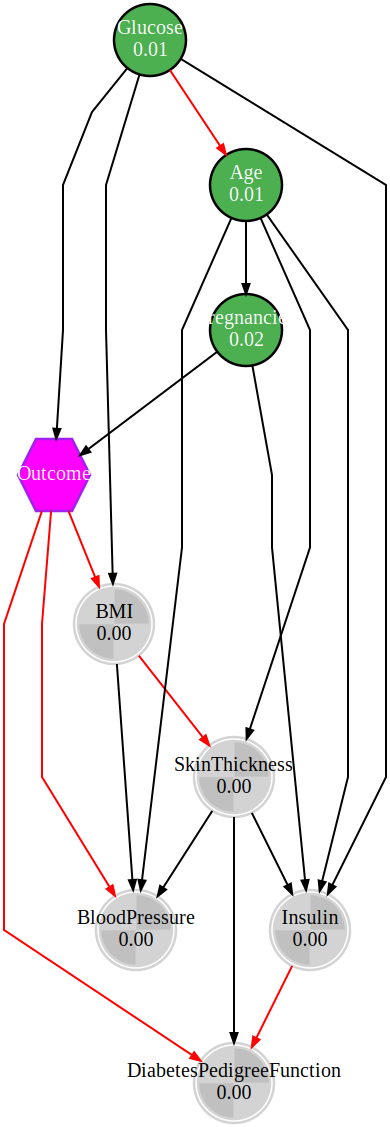

IAMB
No graph
SAM
No graph
BES


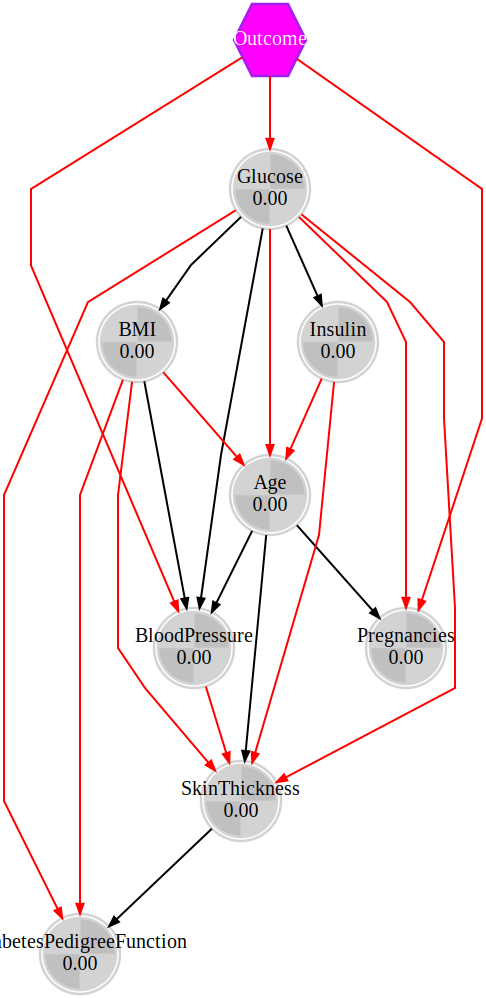

GRASP
No graph
CGNN
No graph


In [15]:
from graphviz import Source

for k, v in graphs.items():
    print(k)

    if v is None: 
        print('No graph')
    else:
        display(Source(v))

In [16]:
from causal_nest.stats import calculate_auc_pr, calculate_shd, calculate_sid
from itertools import combinations

for t1, t2 in list(combinations(problem.discovery_results.keys(), 2)):
    if problem.discovery_results[t1] is None or problem.discovery_results[t2] is None:
        print(f"{t1} / {t2}: - - -")
        continue
        
    g1 = problem.discovery_results[t1].output_graph
    g2 = problem.discovery_results[t2].output_graph
    
    auc_pr = calculate_auc_pr(g1, g2)
    shd = calculate_shd(g1, g2)
    sid = calculate_sid(g1, g2)
    
    print(f"{t1} / {t2}: {auc_pr:.2f} {shd:.2f} {sid:.2f}")

PC / GS: - - -
PC / CCDR: - - -
PC / IAMB: - - -
PC / SAM: - - -
PC / BES: - - -
PC / GRASP: - - -
PC / CGNN: - - -
GS / CCDR: - - -
GS / IAMB: - - -
GS / SAM: - - -
GS / BES: - - -
GS / GRASP: - - -
GS / CGNN: - - -
CCDR / IAMB: - - -
CCDR / SAM: - - -
CCDR / BES: 0.56 15.00 56.00
CCDR / GRASP: - - -
CCDR / CGNN: - - -
IAMB / SAM: - - -
IAMB / BES: - - -
IAMB / GRASP: - - -
IAMB / CGNN: - - -
SAM / BES: - - -
SAM / GRASP: - - -
SAM / CGNN: - - -
BES / GRASP: - - -
BES / CGNN: - - -
GRASP / CGNN: - - -


In [17]:
for k, v in problem.discovery_results.items():
    print(f'\tModel: {k}')
    
    if (v is None):
        print(f'Null results')
        print('\t----------\n')
        continue

    mce_treatment = mce = mce_p = None
    sr = sorted(filter(lambda x: x.estimate.value and x.p_value is not None and x.p_value[0] >= 0, problem.estimation_results[k]), key=lambda x: x.estimate.value, reverse=True)
    if (len(sr) > 0):
        mce = sr[0].estimate.value
        mce_p = sr[0].p_value[0] if sr[0].p_value is not None else -666
        mce_treatment = sr[0].treatment

    ref_rate = 0
    if (mce_treatment is not None):
        refs = list(filter(lambda x: x.treatment == mce_treatment, problem.refutation_results[k]))
        if (len(refs) > 0):
            ref_rate = len(list(filter(lambda x: x.passed == True, refs))) / len(refs)
    
    print(f'FER: {100 * v.forbidden_edges_violation_rate:.2f}')
    print(f'RECR: {100 * v.required_edges_compliance_rate:.2f}')
    print(f'IS: {v.knowledge_integrity_score:.2f}')
    if mce is not None:
        print(f'MCE: {mce:.2f}')
        print(f'MCE P-Value: {mce_p:.2E}')
        print(f'MCE Refutation Rate: {100 * ref_rate:.2f}')
    print('\t----------\n')

	Model: PC
Null results
	----------

	Model: GS
Null results
	----------

	Model: CCDR
FER: 25.00
RECR: 100.00
IS: 0.75
MCE: 0.02
MCE P-Value: 2.82E-07
MCE Refutation Rate: 100.00
	----------

	Model: IAMB
Null results
	----------

	Model: SAM
Null results
	----------

	Model: BES
FER: 54.17
RECR: 100.00
IS: 0.46
	----------

	Model: GRASP
Null results
	----------

	Model: CGNN
Null results
	----------

